<a href="https://colab.research.google.com/github/josepeon/calculus_parsons/blob/main/neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
X = tips[['total_bill']]
y = tips[['tip']]

In [5]:
X = (X - X.mean())/X.std()

In [6]:
model = nn.Linear(in_features = 1, out_features = 1)

In [7]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3745]], requires_grad=True),
 Parameter containing:
 tensor([0.3845], requires_grad=True)]

In [8]:
#Turn into Pytorch tensors
xt = torch.tensor(X.values, dtype = torch.float32)
yt = torch.tensor(y.values, dtype = torch.float32)

In [9]:
model(xt)

tensor([[ 0.5021],
        [ 0.7818],
        [ 0.3330],
        [ 0.2207],
        [ 0.1824],
        [ 0.1529],
        [ 0.8478],
        [ 0.0861],
        [ 0.5841],
        [ 0.5950],
        [ 0.7847],
        [-0.2664],
        [ 0.5681],
        [ 0.4415],
        [ 0.5929],
        [ 0.3090],
        [ 0.7822],
        [ 0.5315],
        [ 0.5029],
        [ 0.3481],
        [ 0.4630],
        [ 0.3633],
        [ 0.5534],
        [-0.4414],
        [ 0.3830],
        [ 0.4676],
        [ 0.6543],
        [ 0.6829],
        [ 0.3040],
        [ 0.3902],
        [ 0.8150],
        [ 0.4449],
        [ 0.5833],
        [ 0.3464],
        [ 0.4688],
        [ 0.2047],
        [ 0.5307],
        [ 0.5046],
        [ 0.4306],
        [-0.0986],
        [ 0.5420],
        [ 0.4823],
        [ 0.6304],
        [ 0.8096],
        [-0.0620],
        [ 0.4474],
        [ 0.2817],
        [-0.1461],
        [ 0.0158],
        [ 0.4579],
        [ 0.6893],
        [ 0.7839],
        [-0.

In [10]:
mse = nn.MSELoss()

In [11]:
yhat = model(xt)

In [12]:
mse(yt, yhat)

tensor(9.5756, grad_fn=<MseLossBackward0>)

In [13]:
loss = mse(yt, yhat)

In [14]:
loss.backward()

In [15]:
import torch.optim as optim

In [16]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [17]:
yhat = model(xt) #make predictions
loss = (mse(yt, yhat)) #evaluate errors
loss.backward() #computes derivatives
optimizer.step() #steps down loss function one iteration

In [18]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3223]], requires_grad=True),
 Parameter containing:
 tensor([0.4890], requires_grad=True)]

In [19]:
new_yhat = model(xt)

In [20]:
mse(yt, new_yhat)

tensor(8.9067, grad_fn=<MseLossBackward0>)

In [21]:
losses = []
for epoch in range(1000):
  #pass data through the model
  yhat = model(xt)
  #evaluate the predictions
  loss = mse(yt, yhat)
  #calculate derivatives
  optimizer.zero_grad() #pytorch thing to clear memory of derivatives
  loss.backward()
  losses.append(loss.item())
  #update parameters using gradient descent
  optimizer.step()

In [22]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9350]], requires_grad=True),
 Parameter containing:
 tensor([2.9983], requires_grad=True)]

In [23]:
losses

[8.906675338745117,
 8.595251083374023,
 8.296147346496582,
 8.008879661560059,
 7.7329792976379395,
 7.4679951667785645,
 7.213496208190918,
 6.969066143035889,
 6.734307765960693,
 6.508839130401611,
 6.292291164398193,
 6.084312438964844,
 5.884562015533447,
 5.692716121673584,
 5.508460998535156,
 5.331496715545654,
 5.161533832550049,
 4.998295783996582,
 4.841518402099609,
 4.690942764282227,
 4.54632568359375,
 4.407430648803711,
 4.274030685424805,
 4.145910739898682,
 4.0228590965271,
 3.904676914215088,
 3.791170358657837,
 3.6821553707122803,
 3.577453851699829,
 3.4768948554992676,
 3.380315065383911,
 3.2875566482543945,
 3.1984682083129883,
 3.112905263900757,
 3.0307271480560303,
 2.9518015384674072,
 2.875998020172119,
 2.803194284439087,
 2.733271360397339,
 2.666114568710327,
 2.6016156673431396,
 2.539668560028076,
 2.480172872543335,
 2.4230306148529053,
 2.368149995803833,
 2.3154404163360596,
 2.264816999435425,
 2.216196060180664,
 2.169499397277832,
 2.124650239

In [24]:
import matplotlib.pyplot as plt

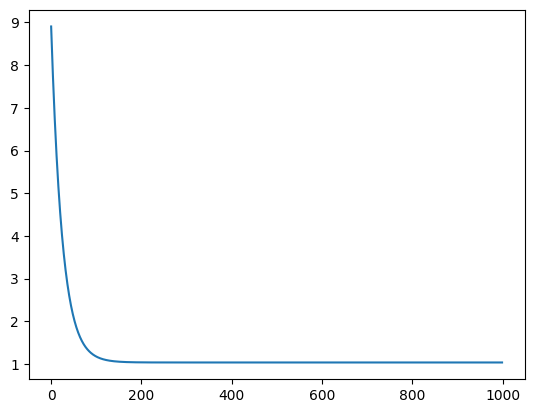

In [25]:
plt.plot(losses)

In [26]:
digits = pd.read_csv('sample_data/mnist_train_small.csv')
digits.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


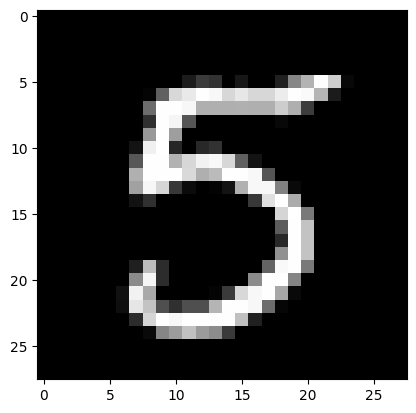

In [27]:
plt.imshow(digits.iloc[0,1:].values.reshape(28,28), cmap = 'gray')

In [28]:
Xt = torch.tensor(digits.iloc[:,1:].values, dtype = torch.float32)
yt = torch.tensor(digits.iloc[:,1].values, dtype = torch.float32).reshape(-1, 1)

In [29]:
model = nn.Sequential(nn.Linear(in_features = 784, out_features = 10))
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [30]:
yt.shape

torch.Size([19999, 1])

In [31]:
model(Xt).shape

torch.Size([19999, 10])

In [32]:
losses = []
for epoch in range(1000):
  #pass data through the model
  yhat = model(Xt)
  #evaluate the predictions
  loss = mse(yt, yhat)
  #calculate derivatives
  optimizer.zero_grad() #pytorch thing to clear memory of derivatives
  loss.backward()
  losses.append(loss.item())
  #update parameters using gradient descent
  optimizer.step()

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([19999, 10])) that is different to the input size (torch.Size([19999, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


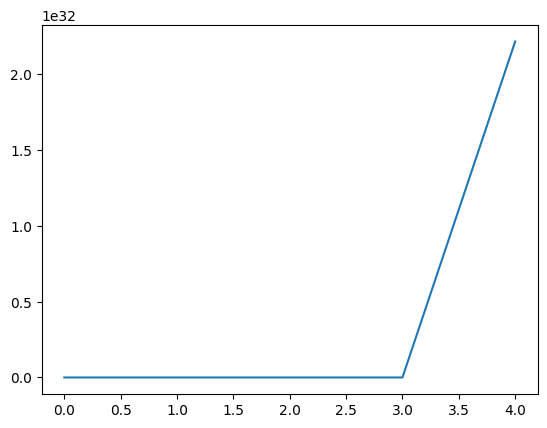

In [33]:
plt.plot(losses)